In [1]:
# CH02 1차원 데이터 정리
# 통계분석을 시작하는 첫걸음은 데이터를 정리하여 데이터의 특징을 대략적으로 파악하는 것
# 데이터의 개요를 파악하면 수많은 통계분석 기법 중에서 적절한 기법을 선택해 다음 걸음을 내딛을 수 있다

# 데이터의 특징을 파악하는 방법에는 크게 두 가지가 있다
# 하나는 평균이나 분산 등의 수치 지표에 따라 데이터를 요약하는 방법이고
# 다른 하나는 그림을 그려 시각적으로 데이터를 조감하는 방법이다

In [2]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

#DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [3]:
df = pd.read_csv('../python_stat_sample-master/data/ch2_scores_em.csv', index_col = 'student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [4]:
# 위의 데이터에서 10번까지의 데이터를 NumPy로 계산하기 위해 NumPy의 array 데이터 구조로 된 scores라는 이름으로 저장
# array는 수치 계산에 강점을 지닌 다차원 배열이다

In [5]:
scores = np.array(df['english'][:10])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [6]:
# 마찬가지로 scores_df라는 이름으로 Pandas의 DataFrame을 작성한다
# DataFrame에는 10명의 학생 각각에 A, B, ... 라는 이름을 부여

In [7]:
scores_df = pd.DataFrame({'score' : scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [8]:
# 2.1 데이터 중심의 지표
# 첫 번째 주제는 데이터를 중심으로 나타내는 지표이다
# 데이터를 하나의 값으로 요약한 지표이며 대푯값이라고도 부른다
# 예를 들어 어떤 시험의 난이도를 알고 싶다면 전체 학새으이 시험 점수를 확인하지 않더라도
# 평균 점수를 알면 파악할 수 있다
# 평균 점수가 30점이라면 시험이 어려웠음, 평균 점수가 90점이라면 시험이 쉬웠음을 의미

In [9]:
# 2.1.1 평균값
# 평균값, mean은 데이터를 모두 더한 뒤, 데이터의 개수로 나누어 구한다
# 파이썬으로 나타내는 방법은
sum(scores) / len(scores)

55.000

In [10]:
# NumPy를 사용하면
np.mean(scores)

55.000

In [11]:
# DataFrame에서는 mean 메서드를 사용하여 구할 수 있다
# Series에서도 동일하게 mean 메서드를 사용하여 평균을 구할 수 있다
scores_df.mean()

score    55.0
dtype: float64

In [12]:
# NumPy의 array에서도 mean 메서드가 있기 때문에 scores.mean()으로 평균을 구할 수 있지만
# NumPy의 함수를 사용하는 것으로 통일
# Pandas에서는 pd.mean()이라는 함수가 없기 때문에 DataFrame이나 Series의 메서드를 사용한다

# NumPY나 Pandas의 함수명은 통계 용어의 영어 단어를 그대로 쓰거나 약칭한 것이 대부분
# 주요 통계 용어는 영어 표현도 함께 기억해두자
# 통계 용어의 영어 표현을 기억하고 있으면 변수에 이름을 붙일 때 편리하다

In [13]:
# 2.1.2 중앙값
# 중앙값, median은 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값이다
# ex [9, 1, 5, 3, 7]이라는 데이터가 있다면 중앙값은? 5이다

# 중앙값은 평균값에 비해 이상값에 강하다는 특성이 있다
# 즉, 이상값에 영향을 덜 받는다는 의미!

# e.g. [1, 2, 3, 4, 5, 6, 1000] 이라는 큰 이상값을 포함한 데이터가 있다고 가정
# 이 데이터의 대푯값을 구하려고 할 때 평균값은 1000이라는 값에 크게 영향을 받음
# 150에 가까운 값이 된다
# 150이라는 수치는 이 데이터를 적절하게 표현한다고 할 수 없다
# 중앙값이라면 데이터의 개수가 7이므로 4번째인 4가 중앙값이 된다
# 즉, 데이터에 큰 이상이 있는 경우, 대푯값으로 평균값보다 중앙값이 적절하다

# 중앙값은 데이터를 순서대로 나열할 때 정확하게 중앙에 위치하는 값이지만
# 데이터의 개수가 짝수일 때는 중앙에 위치하는 값이 2개이다
# [1, 2, 3, 4, 5, 6] 이라는 데이터에서 중앙에 위치하는 값은 3과 4이다(쓰리 포!)
# 이 경우 중앙값은 두 값의 평균값으로 정의된다, 즉 3.5가 중앙값이 된다

In [14]:
# 영어 시험 점수의 중앙값을 구해보자
# 우선 점수를 크기순으로 나열해야 한다, 정렬하기 위해 np.sort를 사용
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [15]:
# 이 때 중앙값의 정의를 코드로 작성
# 파이썬 리스트의 인덱스는 0부터 시작하는 것에 주의!

n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else :
    median = sorted_scores[(n+1)//2 -1]
median

56.500

In [16]:
# NumPy
np.median(scores)

56.500

In [17]:
# DataFrame / Series
scores_df.median()

score    56.5
dtype: float64

In [18]:
# 2.1.3 최빈값
# 최빈값, mode는 데이터에서 가장 많이 나타나는 값
# 최빈값은 DataFrame이나 Series의 mode 메서드를 사용하여 구할 수 있다

pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [19]:
# 최빈값은 기본적으로는 질적 데이터의 대푯값을 구할 때 사용하는 지표
# 왜냐하면, 시험 점수와 같은 양적 데이터에서는 최빈값을 구하려고 해도 
# 완전히 동일한 점수가 여러 번 나오는 경우가 거의 없어, 유일한 값이 결정되지 않을 때가 많기 때문!
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [20]:
# 다만, 도수분포표를 도입하면 야야적 데이터에서도 최빈값을 자연스럽게 정의할 수 있다

In [21]:
# 2.2 데이터의 산포도 지표
# 2.2.1 분산과 표준편차

# 편차
# 산포도를 구하는 첫걸음은 편차, deviation을 알아보는 것!
# 편차는 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표이다
# e.g. A 학생 점수가 42점이고 학생 10명의 점수가 55점이라면 A학생의 편차는 -13점이다
# NumPy에는 브로드캐스트라는 기능이 있으므로 이를 이용하면 편차를 구할 수 있다

# 브로드캐스트?
# 배열과 하나의 숫자와의 조합으로 이루어진 산술 연산을 수행하는 기능
# 숫자 하나와 배열의 원소별 계산이 한 번씩 수행된다

mean = np.mean(scores)
deviation = scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [22]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [23]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [24]:
# 분산
# 산포도의 지표로 각 데이터와 평균 간 차이를 나타내는 편차를 이용하는 것은 바람직한 생각이나
# 편차의 평균이 항상 0이 되므로 잘 사용하지 않는다

# 각각의 산포도라는 의미에서 보면 B 학생과 D 학생은 모두 평균이 14점 떨어져 있어 동일한 정도의 산포도를 갖고 있는 것 같다
# 이 때문에 평균보다 14점이 작든 크든 이 둘을 동일하게 취급하여 편차의 제곱을 이용한다
# 그리고 그 평균으로 정의되는 지표가 분산, variance가 된다

In [25]:
# 분산을 정의에 따라 계산
np.mean(deviation**2)

86.000

In [26]:
# NumPy에서는 var 함수로 계산할 수 있다
np.var(scores)

86.000

In [27]:
# DataFrame이나 Series에도 분산을 계산하는 var 메서드가 있지만 문제가 조금 있다
scores_df.var(0)

score    95.556
dtype: float64

In [28]:
# Pandas에서 계산한 분산은 다른 값이 된다
# 사실 분산에는 표본분산과 불편분산 두 종류가 있고
# NumPy와 Pandas는 서로 다른 분산을 게산한다
# 앞서 설명한 것은 표본분산이고 NumPy에서 기본으로 설정된 분산이고
# Pandas에서는 기본으로 불편분산이 설정되어 있다
# 불편분산은 추측통계에서 매우 중요한 역할을 하는 지표! 나중에 알아본다

# Pandas에서 표본분산을 계산하고 싶으면 var 메서드의 인수를 ddof=0이라고만 설정하면 된다
# 불편분산은 ddof=1일 때에 해당한다
# NumPy의 var 메서드에도 ddof 인수를 설정할 수 있고, 동일하게 동작한다
# NumPy와 Pandas의 기본 설정 독작이 달라 혼란스럽기 때문에, 분산을 계산할 때는
# 항상 ddof 인수를 설정하여 어떤 분산을 계산하는지 명시해두는 것이 좋다

In [29]:
# summary_df에 편차 제곱 열을 추가
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [30]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [31]:
# 분산은 흔희 S^2로 표기한다
# 분산을 면적의 평균이라는 이미지로 바라보는 시각도 있다
# 왜냐하면 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 생각할 수 있기 때문
# 분산은 그렇게 한 변이 편차인 정사각혀으이 면적으로 생각할 수 있다
# 이렇게 연상하면 공분산을 쉽게 이해할 수 있을 것

In [32]:
# 표준편차
# 평균의 단위는 원래의 데이터 단위와 다르지 않으므로, 영어 시험 점수라면 평균도 점수라는 단위를 쓴다
# 결국 평균은 55점으로 표현할 수 있다
# 그러나, 분산은 점수의 면적으로 나타내므로 점수의 제곱이라는 이해하기 어려운 단위를 사용한다
# 영어 점수의 분산이 86점^2 이라고 말해도 그다지 감이 오지 않는다

# 이 때문에 원래의 데이터와 동일한 단위를 쓰는 산포도의 지표가 있다면 도움이 된다
# 그와 같은 산포도 지표로 분산에 제곱근을 취한 "표준편차, standard deviation"를 이용한다
# 분산에 제곱근을 취하면 되므로, np.var와 np.sqrt를 사용하여 계산할 수 있다

In [33]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [34]:
# Numpy의 std 함수로 계산해도 된다
# std도 var과 마찬가지로 ddof 인수를 취하면 동일한 동작을 나타낸다
# e.g. ddof = 0으로 하면 표준분산에 제곱근을 취한 것이 출력된다
# DataFrame과 Series도 마찬가지

In [35]:
np.std(scores, ddof=0)

9.274

In [36]:
# 표준편차는 원래의 데이터와 동일한 단위를 쓰므로, 동일한 차원으로 그릴 수 있다

In [37]:
# 2.2.2 범위와 사분위 범위
# 범위
# 범위, range는 분산이나 표준편차와 달리, 데이터 전체를 보는 것이 아니라 
# 데이터의 최댓값과 최솟값만으로 산포도를 표현하는 방법
# 최댓값-최솟값 차이카 크면 산포도가 크고 차이가 작으면 산포도도 작다는 의미
# 간단히 계산할 수 있지만 값이 2개뿐이므로 개략적인 지표이고 이상값에 약하다고 할 수 있다

In [38]:
# 수식과 파이썬을 사용하면 다음과 같다
# Rg = xmax - xmin
np.max(scores) - np.min(scores)

28

In [39]:
# 사분위 범위
# 범위는 최댓값과 최솟값밖에 보이지 않으므로, 큰 이상값이 하나라도 있으면 범위도 크게 변화한다
# 이 때문에 최댓값과 최솟값이 아니라, 데이터의 상위수 %에 위치하는 값과 하위수 %에 위치하는 값의 차이를 취하는 방법을 생각할 수 있다

# 특히 사분위 범위(interquartile range)에서는 데이터의 하위 25%, 50%, 75%에 위치하는 값에 주목한다
# 이를 각각 제1사분위수, 제2사분위수, 제3사분위수라고 하며, Q1, Q2, Q3으로 나타낸다
# 그리고 Q3 - Q1을 사분위 범위 IQR로 정의한다

In [40]:
# scores의 IQR을 구해보자
# 데이터의 25%p 등은 NumPy의 percentile 함수로 구할 수 있다

scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [41]:
# IQR을 구할 때는 Q2를 사용하지 않지만 Q2는 중앙값과 일치한다
# 분산은 평균에 대해서 정의되는 산포도의 지표인 반명,
# IQR은 중앙값에 대해서 정의되는 산포도의 지표라고 해석할 수 있다

In [42]:
# 2.2.3 데이터의 지표 정리
# DataFrame이나 Series에는 지금까지 다룬 다양한 지표를 한 번에 구할 수 있는 편리한 method가 있다
# describe method이다
# 데이터가 주어지면 우선 describe를 사용해 개요를 파악해보는 것도 좋다

In [43]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [44]:
# 2.3 데이터의 정규화
# 시험 점수는 동일한 60점이라도 평균 점수가 30점인 어려운 시험에서 얻은 60점과
# 평균 점수가 90점인 쉬운 시험에서 얻은 60점은 상대적인 결과가 다르다
# 점수라는 지표는 그 시험의 평균이나 분산에 따라 평가가 달라진다
# 그러므로 평균이나 분산에 의존하지 않고도 데이터의 상대적인 위치 관계를 알 수 있는 지표가 있다면 편리할 것

# 이와 같은 대표적인 지표로 편찻값이 있다
# 평균이나 분산이 어떻게 나오든, 편찻값이 50이면 평균적인 결과이고
# 편찻값이 60이면 상위 결과라는 통일된 평가를 할 수 있다
# 이처럼 데이터를 통일된 지표로 변환하는 것을 정규화(nomarlization)라고 한다
# 정규화를 통해 다양한 데이터를 동일한 기준으로 다룰 수 있기 때문에
# 데이터를 분석할 때 정규화는 일반적으로 사용하는 수단이 된다

In [45]:
# 2.3.1 표준화
# 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화(standardzation)라고 하며
# 표준화된 데이터를 표준화 변량(standardized data)이나 Z 점수(z-score)라고 한다

In [46]:
# 시험 점수를 표준화 해 보자
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [47]:
# 표준화 된 데이터는 평균이 0, 표준편차가 1이다
np.mean(z), np.std(z, ddof = 0)

(-0.000, 1.000)

In [48]:
# 데이터와 동일한 단위를 쓰는 표준편차로 나눗셈을 하고 있기 때문에
# 표준화된 데이터는 점수와 같은 단위를 쓰지 않는다는 사실에 주의

In [49]:
# 2.3.2 편찻값
# 편찻값은 평균이 50, 표준편차가 10이 되도록 정규화한 값을 말한다
# scores의 데이터를 사용하여 각 학생의 편찻값 계산
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [50]:
# DataFrame으로 정리하여 점수와 편찻값의 관계 살펴보기
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [51]:
# 2.4 1차원 데이터의 시각화
# 50명의 영어 점수를 사용하여 데이터의 특징이나 분포를 표/그림을 통해 시각적으로 파악해보자
# 50명의 영어 점수에 대한 array를 작성, Series의 descirbe 메서드를 사용하여 주요 지표 확인

# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [52]:
# 2.4.1 도수분포표
# describe 메서드로 출력된 평균이나 분산, 사분위수 등의 지표로 데이터의 중심이나 산포도 상태를 알 수 있지만
# 데이터의 분포 상태를 세부적으로 알고 싶을 때가 있다
# 그럴 때 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가있는지를 세는 방법이 있다
# 이처럼 분할된 구간과 데이터의 개수를 표로 정리한 것이 도수분포표(frequency distribution table)이다

# 시험 점수를 0~10점인 구간, 10~20점인 구간, ... , 90~100점인 구간으로 10점 간격이 되게 나눈 후
# 각 구간의 점수를 얻은 학생이 몇 명인지 세어서 도수분포표를 작성할 수 있다
# 이 때 0~10점이라는 구간을 계급(class), 각 계급에 속한 학생 수를 도수(frequency)라고 한다
# 또한 각 구간의 폭을 계급폭이라고 하고, 계급의 수를 계급수라고 한다
# 계급폭은 10점이고 계급수는 10이다

In [53]:
# 도수분포표를 만들어보자
# 도수는 np.histogram() 함수를 사용하면 간단하게 구할 수 있다
# np.histogram()에서는 bins로 계급수를, range로 최솟값과 최댓값을 지정할 수 있다
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [54]:
# DataFrame으로 결과를 정리
# 각 계급에는 하한 ~ 상한 형태로 레이블을 붙인다
# 각 계급에는 하한 이상부터 상한 미만까지 데이터가 분류

# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency' : freq}, index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [55]:
# 데이터를 도수분포표로 정리하면 점수의 분포를 쉽게 알 수 있다
# 이 표만 봐도 50 ~ 70점에 많은 학생들이 몰려 있고, 고득점도 저득점도 없으며
# 점수 차가 많이 나지 않는 시험이었다는 데이터의 특징을 간단히 파악할 수 있다
# 도수분포표에서는 계급과 도수 외에도 계급값, 상대도수, 누적상대도수 등도 자주 함께 사용된다

In [56]:
# 계급값은 각 계급을 대표하는 값으로, 계급의 중앙값이 이용된다
# 60 ~ 70의 계급이면 계급값은 65점이 된다

class_value = [(i + (i + 10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [57]:
# 상대도수는 전체 데이터에 대해서 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타낸다
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [58]:
# 누적 상대도수는 해당 계급까지의 상대도수 합을 나타낸다
# 누적합을 계산할 때 np.cumsum함수를 사용하면 편리
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [59]:
# 계급값과 상대도수, 누적도수를 도수분포표에 추가
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [60]:
# 상대도수나 누적도수를 보면, 전체 학생의 68%가 50 ~ 70점의 점수를 얻었다는 것과
# 전체 학생 중 약 절반이 60점 이하의 점수를 얻었다는 것을 한눈에 알 수 있다

In [64]:
# 최빈값 재검토
# 도수분포표가 완성되었으므로 양적 데이터에 대해서도 자연스럽게 최빈값을 구할 수 있다
# 도수분포표를 사용한 최빈값은 최대가 되는 계급의 계급값으로 정의된다
# 도수분포표를 통해 60 ~ 70인 계급의 도수가 최대인 것을 알 수 있으므로 이 데이터의 최댓값은 65점이다

freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [65]:
# 여기서 주의해야 할 점 
# 최빈값은 도수분포표를 만드는 방법에 의존한다는 점
# e.g. 계급폭을 4점으로 하여 도수분포표를 계산하면 최빈값은 66점이 된다

In [66]:
# 2.4.2 히스토그램
# 히스토그램(histogram)은 도수분포표를 막대그래프로 나타낸 것이다
# 히스토그램을 사용하여 데이터의 분포 상태를 더욱 시각적으로 파악할 수 있다
# 여기서는 Matplotlib이라는 라이브러리가 필요하다
# Matplotlib은 파이썬으로 그래프를 그릴 때 사용하는 표준 라이브러리
# Pandas, NumPy, Matplotlib은 통계분석의 세 가지 보물
# 대부분의 통계분석은 이 세 가지 라이브러리만으로 수행할 수 있다

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# 히스토그램은 hist 메서드로 그린다
# 인수 등은 NumPy의 histogram 함수와 동일하다

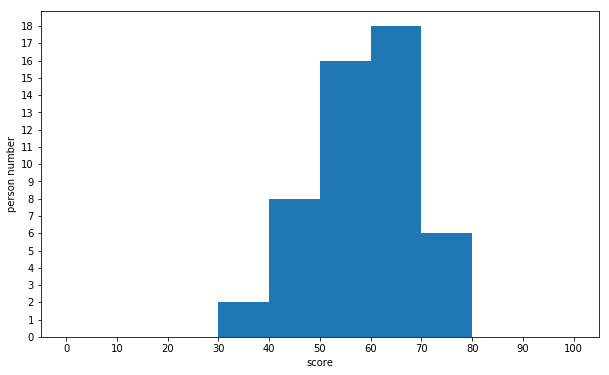

In [70]:
# 캔버스 생성
# figsize로 가로 및 세로 크기 지정
fig = plt.figure(figsize=(10, 6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100))
# x축에 레이블 부여
ax.set_xlabel('score')
# y축에 레이블 부여
ax.set_ylabel('person number')
# x축을 0, 10, 20, ... , 100 눈금으로 구분
ax.set_xticks(np.linspace(0, 100, 10+1))
# y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

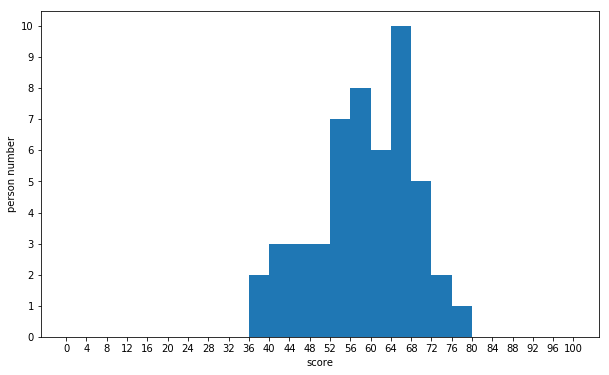

In [72]:
# 계급수를 늘리면 더 세부적인 데이터의 분포를 볼 수 있다
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins = 25, range = (0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

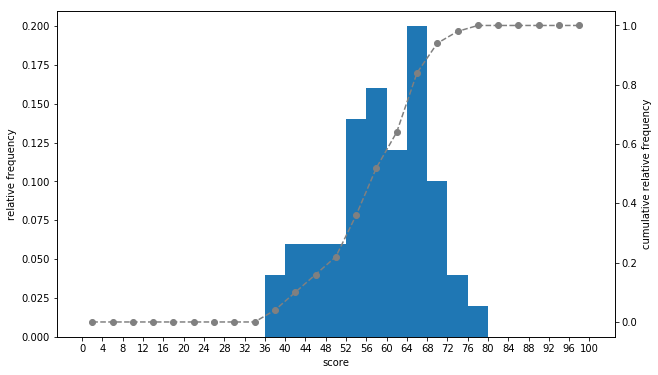

In [74]:
# 상대도수의 히스토그램을 누적도수의 꺾은선그래프와 함께
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 피요가 있음
# 이것은hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins = 25, range = (0, 100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4)) // 2 for i in range(0, 100, 4)]

# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq, ls = '--', marker = 'o', color = 'gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()


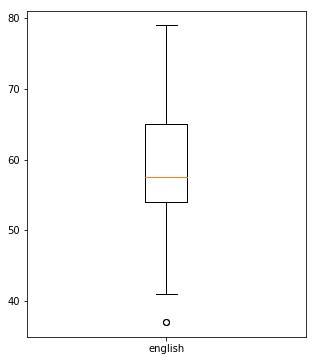

In [75]:
# 2.4.3 상자그림
# 상자그림(box plot)은 데이터의 산포도를 표현하는 그림
# 상자그림을 그리면 데이터의 분포와 이상값을 시각적으로 파악할 수 있따
# 상자그림에서는 분위수 범위의 Q1, Q2, Q3, IQR을 사용한다
# 상자는 Q1부터 Q3를 나타내고 수염은 Q1 - 1.5IQR부터 Q3 + 1.5IQR을 나타낸다
# 여기에 들어가지 않은 데이터는 이상값이 된다
# (이상값을 고려하지 않고 최솟값과 최댓값을 수염으로 표시하는 방법도 있다)

# 상자그림은 boxplot method를 사용

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])

plt.show()